## 🧪 Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/personality_dataset.csv")

# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1

C:\Users\pcadmin\AppData\Local\Temp\ipykernel_31940\1016951988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personality', data=df[df['Personality'].isin(['Introvert', 'Extrovert'])], palette='coolwarm')


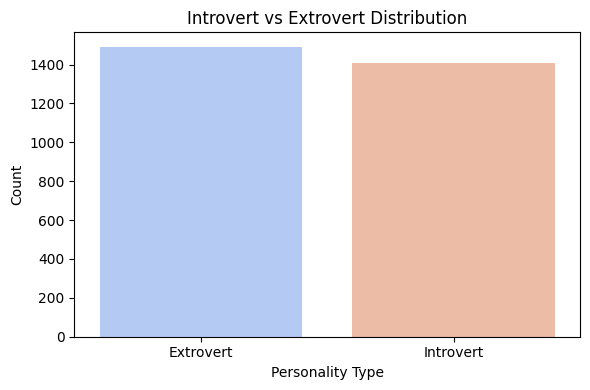

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/personality_dataset.csv")

# Filter only Introvert vs Extrovert
if 'Personality' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Personality', data=df[df['Personality'].isin(['Introvert', 'Extrovert'])], palette='coolwarm')
    plt.title("Introvert vs Extrovert Distribution")
    plt.xlabel("Personality Type")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Personality' column not found.")

### 🔍 Step 2.1: Target Separation & Feature Type Identification

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target and features
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['Stage_fear', 'Drained_after_socializing']
Numerical columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


### 🧼 Step 2.2: Preprocessing Pipelines

In [3]:
# Preprocessing pipelines for numerical and categorical features

# Numerical pipeline: Impute missing values using the mean
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])
print("✅ Numerical transformer pipeline created (Missing values → Mean)")

# Categorical pipeline: Impute using most frequent value, then One-Hot Encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
print("✅ Categorical transformer pipeline created (Missing values → Most frequent, One-Hot Encoding applied)")

✅ Numerical transformer pipeline created (Missing values → Mean)
✅ Categorical transformer pipeline created (Missing values → Most frequent, One-Hot Encoding applied)


### 🛠️ Step 2.3: Combine & Apply Preprocessing

In [4]:
# Combine preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])

# Apply transformation to features
X_processed = preprocessor.fit_transform(X)

print(f"Original X shape: {X.shape}")
print(f"Processed X shape: {X_processed.shape}")

Original X shape: (2900, 7)
Processed X shape: (2900, 9)


### 🎯 Step 2.4: Encoding Target Variable

- Used `LabelEncoder` to convert string labels (e.g., "Introvert", "Extrovert") into numerical form.
- This encoding is essential for training classifiers.

In [5]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Original y shape: {y.shape}")
print(f"Encoded y shape: {y_encoded.shape}")
print("Sample encoded labels:", y_encoded[:5])

Original y shape: (2900,)
Encoded y shape: (2900,)
Sample encoded labels: [0 1 1 0 0]


In [21]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Original y shape: {y.shape}")
print(f"Encoded y shape: {y_encoded.shape}")
print("Sample encoded labels:", y_encoded[:5])

# 🔍 THIS IS WHAT YOU NEED - Print the label mappings
print("\n" + "="*50)
print("🎯 LABEL ENCODER MAPPINGS:")
print("="*50)
print("Classes found:", label_encoder.classes_)
print("\nLabel Mappings:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  '{class_name}' → {i}")

# Show some examples from your actual data
print(f"\nFirst 10 original labels: {y[:10].tolist()}")
print(f"First 10 encoded labels:  {y_encoded[:10].tolist()}")

# Count distribution
unique, counts = np.unique(y_encoded, return_counts=True)
print(f"\nEncoded Label Distribution:")
for label, count in zip(unique, counts):
    original_label = label_encoder.classes_[label]
    print(f"  {label} ('{original_label}'): {count} samples")

Original y shape: (2900,)
Encoded y shape: (2900,)
Sample encoded labels: [0 1 1 0 0]

🎯 LABEL ENCODER MAPPINGS:
Classes found: ['Extrovert' 'Introvert']

Label Mappings:
  'Extrovert' → 0
  'Introvert' → 1

First 10 original labels: ['Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert']
First 10 encoded labels:  [0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

Encoded Label Distribution:
  0 ('Extrovert'): 1491 samples
  1 ('Introvert'): 1409 samples


#####################

### 🛠️ Step 1: Import Libraries and Split Dataset

We start by importing all required libraries and then split our dataset into training and test sets.

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import pickle
import joblib

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (2320, 9)
Test set shape: (580, 9)


### 🤖 Step 2: Define Models and Hyperparameter Grids

We define multiple classifiers and their tuning parameters for `GridSearchCV`.

In [7]:
# Define models and their hyperparameter grids
models_and_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto', 0.001, 0.01]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    }
}

print("✅ Model & hyperparameter grids defined:")
for model_name in models_and_params:
    param_count = len(models_and_params[model_name]['params'])
    print(f"  • {model_name} → {param_count} hyperparameter(s) to tune")

✅ Model & hyperparameter grids defined:
  • Random Forest → 5 hyperparameter(s) to tune
  • Gradient Boosting → 5 hyperparameter(s) to tune
  • SVM → 3 hyperparameter(s) to tune
  • Logistic Regression → 3 hyperparameter(s) to tune


### 🧪 Step 3: Train, Tune, and Evaluate All Models

We tune and evaluate each model using `GridSearchCV`, storing all evaluations for comparison.

In [8]:
from tqdm import tqdm

# 🌟 Store detailed results
detailed_results = {}
accuracy_comparison = []

# Prepare loop with progress bar
models_iter = tqdm(models_and_params.items(), desc="🔄 Training Models", leave=True)

# 🚀 Train and evaluate each model
for model_name, model_info in models_iter:
    print(f"\n{'='*70}")
    print(f"🔧 TUNING MODEL: {model_name.upper()}")
    print(f"{'='*70}")
    
    # Set the progress bar description to current model
    models_iter.set_description(f"⏳ Training: {model_name}")
    
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # 🧠 Train the model
    grid_search.fit(X_train, y_train)
    
    # ✅ Predict
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # 📊 Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    cv_accuracy = grid_search.best_score_
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # 📦 Store detailed results for later
    detailed_results[model_name] = {
        'best_estimator': best_model,
        'best_params': grid_search.best_params_,
        'cv_accuracy': cv_accuracy,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'y_pred': y_test_pred,
        'grid_search': grid_search
    }

    # 📝 Append to summary table
    accuracy_comparison.append({
        'Model': model_name,
        'CV_Accuracy': cv_accuracy,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall,
        'Test_F1': test_f1,
        'Overfitting': train_accuracy - test_accuracy
    })

    # 🖨️ Print Summary Per Model
    print(f"\n📊 Results for {model_name}:")
    print("   ▸ Best CV Accuracy   :", f"{cv_accuracy:.4f}")
    print("   ▸ Train Accuracy     :", f"{train_accuracy:.4f}")
    print("   ▸ Test Accuracy      :", f"{test_accuracy:.4f}")
    print("   ▸ Precision (weighted):", f"{test_precision:.4f}")
    print("   ▸ Recall (weighted)   :", f"{test_recall:.4f}")
    print("   ▸ F1 Score (weighted) :", f"{test_f1:.4f}")
    print("   ▸ Overfitting (ΔTrain-Test):", f"{train_accuracy - test_accuracy:.4f}")
    print("   ✅ Best Params:", grid_search.best_params_)

⏳ Training: Random Forest:   0%|          | 0/4 [00:00<?, ?it/s]


🔧 TUNING MODEL: RANDOM FOREST
Fitting 5 folds for each of 162 candidates, totalling 810 fits


⏳ Training: Gradient Boosting:  25%|██▌       | 1/4 [02:16<06:49, 136.42s/it]


📊 Results for Random Forest:
   ▸ Best CV Accuracy   : 0.9388
   ▸ Train Accuracy     : 0.9427
   ▸ Test Accuracy      : 0.9138
   ▸ Precision (weighted): 0.9149
   ▸ Recall (weighted)   : 0.9138
   ▸ F1 Score (weighted) : 0.9138
   ▸ Overfitting (ΔTrain-Test): 0.0289
   ✅ Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔧 TUNING MODEL: GRADIENT BOOSTING
Fitting 5 folds for each of 72 candidates, totalling 360 fits


⏳ Training: SVM:  50%|█████     | 2/4 [03:45<03:36, 108.48s/it]              


📊 Results for Gradient Boosting:
   ▸ Best CV Accuracy   : 0.9384
   ▸ Train Accuracy     : 0.9388
   ▸ Test Accuracy      : 0.9172
   ▸ Precision (weighted): 0.9183
   ▸ Recall (weighted)   : 0.9172
   ▸ F1 Score (weighted) : 0.9172
   ▸ Overfitting (ΔTrain-Test): 0.0216
   ✅ Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔧 TUNING MODEL: SVM
Fitting 5 folds for each of 32 candidates, totalling 160 fits


⏳ Training: Logistic Regression:  75%|███████▌  | 3/4 [17:48<07:24, 444.16s/it]


📊 Results for SVM:
   ▸ Best CV Accuracy   : 0.9388
   ▸ Train Accuracy     : 0.9388
   ▸ Test Accuracy      : 0.9172
   ▸ Precision (weighted): 0.9183
   ▸ Recall (weighted)   : 0.9172
   ▸ F1 Score (weighted) : 0.9172
   ▸ Overfitting (ΔTrain-Test): 0.0216
   ✅ Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

🔧 TUNING MODEL: LOGISTIC REGRESSION
Fitting 5 folds for each of 20 candidates, totalling 100 fits


⏳ Training: Logistic Regression: 100%|██████████| 4/4 [17:50<00:00, 267.58s/it]


📊 Results for Logistic Regression:
   ▸ Best CV Accuracy   : 0.9388
   ▸ Train Accuracy     : 0.9388
   ▸ Test Accuracy      : 0.9172
   ▸ Precision (weighted): 0.9183
   ▸ Recall (weighted)   : 0.9172
   ▸ F1 Score (weighted) : 0.9172
   ▸ Overfitting (ΔTrain-Test): 0.0216
   ✅ Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


### 📊 Step 4: Compare and Rank Models

We create a structured table to rank models based on their scores.

In [9]:
# Create DataFrame to compare models
comparison_df = pd.DataFrame(accuracy_comparison).round(4)

# Rank by various metrics
print(f"\n{'='*100}")
print("COMPREHENSIVE MODEL COMPARISON")
print(f"{'='*100}")
print(comparison_df)

# Show best per metric
best_cv_model = comparison_df.loc[comparison_df['CV_Accuracy'].idxmax(), 'Model']
best_test_model = comparison_df.loc[comparison_df['Test_Accuracy'].idxmax(), 'Model']
best_f1_model = comparison_df.loc[comparison_df['Test_F1'].idxmax(), 'Model']
least_overfitting = comparison_df.loc[comparison_df['Overfitting'].idxmin(), 'Model']


COMPREHENSIVE MODEL COMPARISON
                 Model  CV_Accuracy  Train_Accuracy  Test_Accuracy  \
0        Random Forest       0.9388          0.9427         0.9138   
1    Gradient Boosting       0.9384          0.9388         0.9172   
2                  SVM       0.9388          0.9388         0.9172   
3  Logistic Regression       0.9388          0.9388         0.9172   

   Test_Precision  Test_Recall  Test_F1  Overfitting  
0          0.9149       0.9138   0.9138       0.0289  
1          0.9183       0.9172   0.9172       0.0216  
2          0.9183       0.9172   0.9172       0.0216  
3          0.9183       0.9172   0.9172       0.0216  


### 🏆 Step 5: Select Final Model Based on Test Accuracy

We select the best performing model based on test accuracy and show all its metrics.

In [10]:
selected_model_name = best_test_model
selected_model_results = detailed_results[selected_model_name]
selected_model = selected_model_results['best_estimator']
selected_params = selected_model_results['best_params']

print(f"\nSELECTED MODEL: {selected_model_name}")
print(f"Test Accuracy: {selected_model_results['test_accuracy']:.4f}")
print(f"CV Accuracy: {selected_model_results['cv_accuracy']:.4f}")
print(f"F1-Score: {selected_model_results['test_f1']:.4f}")


SELECTED MODEL: Gradient Boosting
Test Accuracy: 0.9172
CV Accuracy: 0.9384
F1-Score: 0.9172


### 💾 Step 8: Save Models, Pipeline, Comparison Data, and Metadata

In [ ]:
from sklearn.pipeline import Pipeline

# Build complete pipeline
complete_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', selected_model)
])
complete_pipeline.fit(X, y_encoded)

# Save models and metadata
joblib.dump(complete_pipeline, 'best_personality_model_pipeline.pkl')
joblib.dump(selected_model, 'best_personality_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
comparison_df.to_csv('model_comparison_results.csv', index=False)

# Save full results
with open('detailed_model_results.pkl', 'wb') as f:
    pickle.dump(detailed_results, f)

model_info = {
    'selected_model_name': selected_model_name,
    'selection_criteria': 'Highest Test Accuracy',
    'model_comparison': comparison_df.to_dict('records'),
    'best_params': selected_params,
    'performance_metrics': {
        'cv_accuracy': selected_model_results['cv_accuracy'],
        'test_accuracy': selected_model_results['test_accuracy'],
        'test_precision': selected_model_results['test_precision'],
        'test_recall': selected_model_results['test_recall'],
        'test_f1': selected_model_results['test_f1']
    },
    'feature_names': feature_names if 'feature_names' in locals() else None,
    'target_classes': target_names.tolist()
}

with open('comprehensive_model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("✅ All results and model artifacts have been saved.")

C:\Users\pcadmin\AppData\Local\Temp\ipykernel_77124\3381382311.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pcadmin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


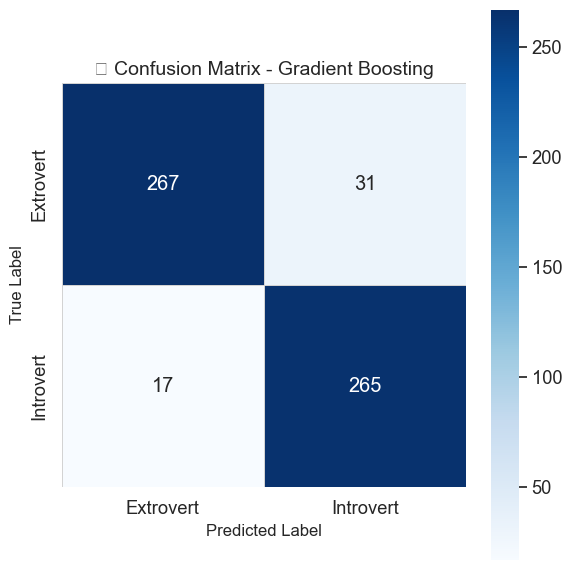

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicted and True Labels
y_pred = selected_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['Extrovert', 'Introvert']  # Customize label names as per your classes

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Control font size
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            xticklabels=labels,
            yticklabels=labels,
            square=True,
            linewidths=0.5,
            linecolor='lightgrey')

# Customize axis and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title(f'📊 Confusion Matrix - {selected_model_name}', fontsize=14)
plt.tight_layout()
plt.show()

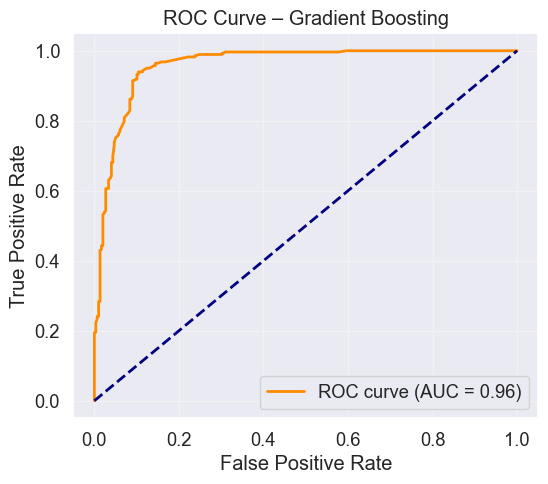

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

if len(set(y_test)) == 2:
    y_proba = selected_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve – {selected_model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

In [18]:
new_data = pd.DataFrame([{
    'Time_spent_Alone': 5,
    'Stage_fear': 'No',
    'Social_event_attendance': 3,
    'Going_outside': 7,
    'Drained_after_socializing': 'No',
    'Friends_circle_size': 10,
    'Post_frequency': 6
}])

# Ensure new_data has the same preprocessing applied
new_data_preprocessed = preprocessor.transform(new_data)

# Make prediction
new_prediction_encoded = best_model.predict(new_data_preprocessed)
new_prediction_personality = label_encoder.inverse_transform(new_prediction_encoded)

print(f"New data prediction: {new_prediction_personality[0]}")


New data prediction: Extrovert


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 📂 Load saved pipeline & label encoder
pipeline = joblib.load('best_personality_model_pipeline.pkl')
label_encoder = joblib.load('label_encoder.pkl')  # Used to decode prediction outputs

# 📄 Load raw dataset (same format used during training)
df = pd.read_csv("data/personality_dataset.csv")

# 🎯 Separate features and target
X = df.drop(columns=["Personality"])
y_actual = df["Personality"]

# 🔁 Encode actual target using label encoder
y_encoded_actual = label_encoder.transform(y_actual)

# ✅ Predict using full pipeline with preprocessing included
y_pred_encoded = pipeline.predict(X)

# 🔁 Decode predictions back to original "Introvert"/"Extrovert"
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# ➕ Add predictions to the original DataFrame
df["Predicted"] = y_pred

# 💾 Save to a new CSV
output_path = "data/personality_dataset_with_predictions3.csv"
df.to_csv(output_path, index=False)
print(f"✅ Predictions saved to: {output_path}")

# 📊 Evaluate accuracy & display classification report
accuracy = accuracy_score(y_actual, y_pred)
print("\n📈 Model Evaluation on Full Dataset")
print("----------------------------------------")
print(f"✅ Accuracy: {accuracy:.4f}\n")
print("🔍 Classification Report:")
print(classification_report(y_actual, y_pred, target_names=label_encoder.classes_))

# 🧾 Sample preview
print("\n🔢 Sample Predictions:")
print(df[['Personality', 'Predicted']].head())

✅ Predictions saved to: data/personality_dataset_with_predictions3.csv

📈 Model Evaluation on Full Dataset
----------------------------------------
✅ Accuracy: 0.9345

🔍 Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94      1491
   Introvert       0.92      0.94      0.93      1409

    accuracy                           0.93      2900
   macro avg       0.93      0.93      0.93      2900
weighted avg       0.93      0.93      0.93      2900


🔢 Sample Predictions:
  Personality  Predicted
0   Extrovert  Extrovert
1   Introvert  Introvert
2   Introvert  Introvert
3   Extrovert  Extrovert
4   Extrovert  Extrovert


In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import joblib
import numpy as np

# 📂 Load saved pipeline & label encoder
pipeline = joblib.load('best_personality_model_pipeline.pkl')
label_encoder = joblib.load('label_encoder.pkl')  # Used to decode prediction outputs

# 📄 Load raw dataset
df = pd.read_csv("data/personality_dataset.csv")

# 🎯 Separate features and target
X = df.drop(columns=["Personality"])
y_actual = df["Personality"]

# 🔁 Encode actual target
y_encoded_actual = label_encoder.transform(y_actual)

# ✅ Predict and get probabilities
y_pred_encoded = pipeline.predict(X)
y_pred_proba = pipeline.predict_proba(X)  # Returns array of shape [n_samples, n_classes]

# 🔁 Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 🧮 Compute confidence based on predicted class index for each row
confidence_scores = [
    y_pred_proba[i, y_pred_encoded[i]] for i in range(len(y_pred_encoded))
]

# ➕ Add predictions and confidence to DataFrame
df["Predicted"] = y_pred
df["Confidence"] = np.round(confidence_scores, 4)  # Rounded to 4 decimal places

# 💾 Save results
output_path = "data/personality_dataset_with_predictions_conf.csv"
df.to_csv(output_path, index=False)
print(f"✅ Predictions with confidence saved to: {output_path}")

# 📊 Evaluate performance
accuracy = accuracy_score(y_actual, y_pred)
print("\n📈 Model Evaluation on Full Dataset")
print("----------------------------------------")
print(f"✅ Accuracy: {accuracy:.4f}\n")
print("🔍 Classification Report:")
print(classification_report(y_actual, y_pred, target_names=label_encoder.classes_))

# 🧾 Preview
print("\n🔢 Sample Predictions:")
print(df[['Personality', 'Predicted', 'Confidence']].head())

✅ Predictions with confidence saved to: data/personality_dataset_with_predictions_conf.csv

📈 Model Evaluation on Full Dataset
----------------------------------------
✅ Accuracy: 0.9345

🔍 Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94      1491
   Introvert       0.92      0.94      0.93      1409

    accuracy                           0.93      2900
   macro avg       0.93      0.93      0.93      2900
weighted avg       0.93      0.93      0.93      2900


🔢 Sample Predictions:
  Personality  Predicted  Confidence
0   Extrovert  Extrovert      0.9540
1   Introvert  Introvert      0.9122
2   Introvert  Introvert      0.9346
3   Extrovert  Extrovert      0.7992
4   Extrovert  Extrovert      0.9628
